# Import Data & Interpolation

In [1]:
import numpy as np
import pandas as pd # for dataframe

In [2]:
# load the data-set
df = pd.read_csv('STOCK_INDEX.csv')

# head of data-set
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0.0
1,2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0.0
2,2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0.0
3,2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0.0
4,2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0.0


In [33]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [34]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2667.000000,2667.000000,2667.000000,2667.000000,2667.000000,2.667000e+03
mean,8269.195149,8312.379344,8211.006332,8261.834986,8261.834986,2.178558e+05
std,2585.209169,2592.927841,2568.153153,2581.268450,2581.268450,2.291874e+05
min,4623.149902,4623.149902,4531.149902,4544.200195,4544.200195,0.000000e+00
25%,5815.699951,5855.649902,5764.375000,5817.650147,5817.650147,0.000000e+00
50%,8132.950195,8180.200195,8089.399902,8129.350098,8129.350098,1.662000e+05
75%,10481.300295,10534.850100,10415.774905,10471.750000,10471.750000,2.771000e+05
max,15371.450200,15431.750000,15243.400390,15314.700200,15314.700200,1.811000e+06


In [35]:
# check NA value
df.isnull().sum()

Date          0
Open         27
High         27
Low          27
Close        27
Adj Close    27
Volume       27
dtype: int64

<Axes: xlabel='Date'>

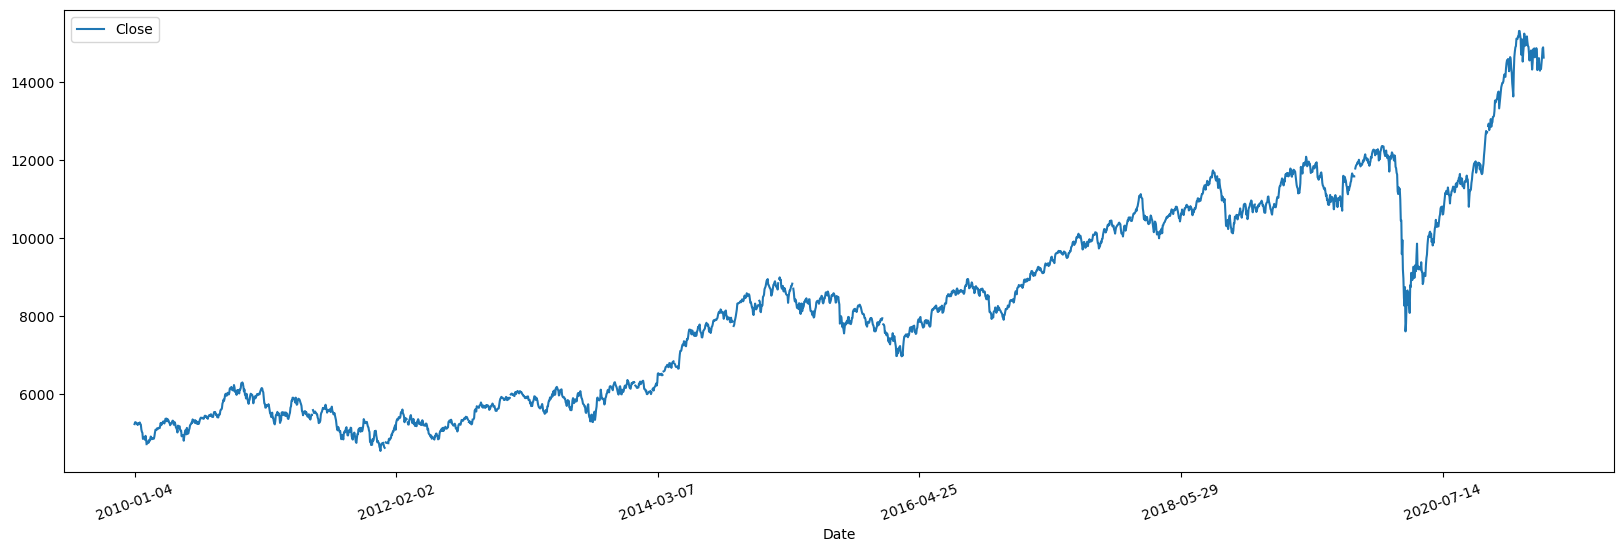

In [3]:
# Plotting the stock prices
%matplotlib inline
df.plot(x='Date', y='Close', kind='line', figsize=(20,6), rot=20)

In [4]:
df = df.interpolate() # linear interpolation
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [5]:
StockData = df

In [17]:
# Extracting the closing prices of each day
FullData=StockData[['Close']].values
print(FullData[0:5])

# Feature Scaling for fast training of neural networks
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Choosing between Standardization or normalization
#sc = StandardScaler()
sc=MinMaxScaler()

DataScaler = sc.fit(FullData)
X=DataScaler.transform(FullData)
#X=FullData

print('### After Normalization ###')
X[0:5] # X is normalised data of closed price

[[5232.200195]
 [5277.899902]
 [5281.799805]
 [5263.100098]
 [5244.75    ]]
### After Normalization ###


array([[0.06387819],
       [0.06812123],
       [0.06848332],
       [0.06674712],
       [0.06504339]])

In [40]:
# Considering the Full Data again which we extracted above
# Printing the last 10 values
print('Original Prices')
print(FullData[-10:])

print('###################')

# Printing last 10 values of the scaled data which we have created above for the last model
# Here I am changing the shape of the data to one dimensional array because
# for Multi step data preparation we need to X input in this fashion
X=X.reshape(X.shape[0],)
print('Scaled Prices')
print(X[-10:])

Original Prices
[[14617.84961]
 [14359.4502 ]
 [14296.40039]
 [14406.15039]
 [14341.34961]
 [14485.     ]
 [14653.04981]
 [14864.54981]
 [14894.90039]
 [14631.09961]]
###################
Scaled Prices
[0.93530007 0.91130867 0.90545473 0.9156446  0.9096281  0.92296549
 0.93856828 0.95820525 0.96102318 0.93653028]


In [41]:
# Multi step data preparation

# split into samples
X_samples = list()
y_samples = list()

NumerOfRows = len(X)
TimeSteps=50  # next few day's Price Prediction is based on last how many past day's prices
FutureTimeSteps=2 # How many days in future you want to predict the prices

# Iterate thru the values to create combinations
for i in range(TimeSteps , NumerOfRows-FutureTimeSteps , 1):
    x_sample = X[i-TimeSteps:i]
    y_sample = X[i:i+FutureTimeSteps]
    X_samples.append(x_sample)
    y_samples.append(y_sample)

################################################

# Reshape the Input as a 3D (samples, Time Steps, Features)
X_data=np.array(X_samples)
X_data=X_data.reshape(X_data.shape[0],X_data.shape[1], 1)
print('### Input Data Shape ###') 
print(X_data.shape)

# We do not reshape y as a 3D data  as it is supposed to be a single column only
y_data=np.array(y_samples)
print('### Output Data Shape ###') 
print(y_data.shape)

### Input Data Shape ###
(2642, 50, 1)
### Output Data Shape ###
(2642, 2)


In [42]:
# Choosing the number of testing data records
TestingRecords=264 # spliting into 90:10

# Splitting the data into train and test
X_train=X_data[:-TestingRecords]
X_test=X_data[-TestingRecords:]
y_train=y_data[:-TestingRecords]
y_test=y_data[-TestingRecords:]

#############################################
# Printing the shape of training and testing
print('\n#### Training Data shape ####')
print(X_train.shape)
print(y_train.shape)

print('\n#### Testing Data shape ####')
print(X_test.shape)
print(y_test.shape)


#### Training Data shape ####
(2378, 50, 1)
(2378, 2)

#### Testing Data shape ####
(264, 50, 1)
(264, 2)


In [43]:
# Visualizing the input and output being sent to the LSTM model
# Based on last 50 days prices we are learning the next 2 days of prices
for inp, out in zip(X_train[0:2], y_train[0:2]):
    print(inp)
    print('====>')
    print(out)
    print('#'*20)

[[0.06387819]
 [0.06812123]
 [0.06848332]
 [0.06674712]
 [0.06504339]
 [0.06547511]
 [0.06185411]
 [0.06404067]
 [0.06645   ]
 [0.06573511]
 [0.06783807]
 [0.06327002]
 [0.0629033 ]
 [0.05106074]
 [0.04566174]
 [0.04305276]
 [0.02868018]
 [0.02999395]
 [0.03136805]
 [0.03300682]
 [0.02654472]
 [0.03599182]
 [0.02796062]
 [0.01619699]
 [0.01813516]
 [0.02007332]
 [0.02306761]
 [0.01977624]
 [0.02624297]
 [0.02393111]
 [0.02892622]
 [0.03433451]
 [0.03189729]
 [0.02791883]
 [0.02898656]
 [0.0302539 ]
 [0.02919084]
 [0.0292976 ]
 [0.03510511]
 [0.04389767]
 [0.05049904]
 [0.04977019]
 [0.05055476]
 [0.05383221]
 [0.05174317]
 [0.05311265]
 [0.05470495]
 [0.05503921]
 [0.05428715]
 [0.06071212]]
====>
[0.06671924 0.06137134]
####################
[[0.06812123]
 [0.06848332]
 [0.06674712]
 [0.06504339]
 [0.06547511]
 [0.06185411]
 [0.06404067]
 [0.06645   ]
 [0.06573511]
 [0.06783807]
 [0.06327002]
 [0.0629033 ]
 [0.05106074]
 [0.04566174]
 [0.04305276]
 [0.02868018]
 [0.02999395]
 [0.031368

In [44]:
# Defining Input shapes for LSTM
TimeSteps=X_train.shape[1]
TotalFeatures=X_train.shape[2]
print("Number of TimeSteps:", TimeSteps)
print("Number of Features:", TotalFeatures)

Number of TimeSteps: 50
Number of Features: 1


In [70]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the First input hidden layer and the LSTM layer
# return_sequences = True, means the output of every time step to be shared with hidden next layer
regressor.add(LSTM(units = 20, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))


# Adding the Second hidden layer and the LSTM layer
regressor.add(LSTM(units = 10, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))

# Adding the Third hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', return_sequences=False ))


# Adding the output layer
# Notice the number of neurons in the dense layer is now the number of future time steps 
# Based on the number of future days we want to predict
regressor.add(Dense(units = FutureTimeSteps))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

###################################################################

import time
# Measuring the time taken by the model to train
StartTime=time.time()

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 64, epochs = 150)

EndTime=time.time()
print("############### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes #############')

Epoch 1/150
38/38 [==============================] - 5s 34ms/step - loss: 0.0789
Epoch 2/150
38/38 [==============================] - 1s 34ms/step - loss: 0.0053
Epoch 3/150
38/38 [==============================] - 1s 35ms/step - loss: 0.0026
Epoch 4/150
38/38 [==============================] - 1s 37ms/step - loss: 0.0012
Epoch 5/150
38/38 [==============================] - 1s 36ms/step - loss: 8.1862e-04
Epoch 6/150
38/38 [==============================] - 1s 37ms/step - loss: 7.2353e-04
Epoch 7/150
38/38 [==============================] - 1s 35ms/step - loss: 6.9529e-04
Epoch 8/150
38/38 [==============================] - 1s 35ms/step - loss: 6.5433e-04
Epoch 9/150
38/38 [==============================] - 1s 35ms/step - loss: 6.3010e-04
Epoch 10/150
38/38 [==============================] - 2s 46ms/step - loss: 6.0612e-04
Epoch 11/150
38/38 [==============================] - 2s 51ms/step - loss: 5.8650e-04
Epoch 12/150
38/38 [==============================] - 2s 48ms/step - loss: 5.75

In [71]:
# Making predictions on test data
predicted_Price = regressor.predict(X_test)
predicted_Price = DataScaler.inverse_transform(predicted_Price)

# Getting the original price values for testing data
orig=y_test
orig=DataScaler.inverse_transform(y_test)

# Accuracy of the predictions
print('Accuracy:', 100 - (100*(abs(orig-predicted_Price)/orig)).mean())


9/9 [==============================] - 1s 11ms/step
Accuracy: 97.77924335615289


In [72]:

def mda(actual, predicted):
    """
    Calculates the Mean Directional Accuracy (MDA) for two time series.
    
    Parameters:
    actual (array-like): The actual values for the time series.
    predicted (array-like): The predicted values for the time series.
    
    Returns:
    float: The MDA value.
    """
    actual = np.array(actual)
    predicted = np.array(predicted)
    
    # calculate the signs of the differences between consecutive values
    actual_diff = np.diff(actual)
    actual_signs = np.sign(actual_diff)
    predicted_diff = np.diff(predicted)
    predicted_signs = np.sign(predicted_diff)
    
    # count the number of times the signs are the same
    num_correct = np.sum(actual_signs == predicted_signs)
    
    # calculate the MDA value
    mda = num_correct / (len(actual) - 1)
    
    return mda

print("Directional Accuracy : -" ,mda(orig,predicted_Price)*100)

Directional Accuracy : - 40.3041825095057


9/9 [==============================] - 0s 9ms/step
RMSE: 378.5353265631622


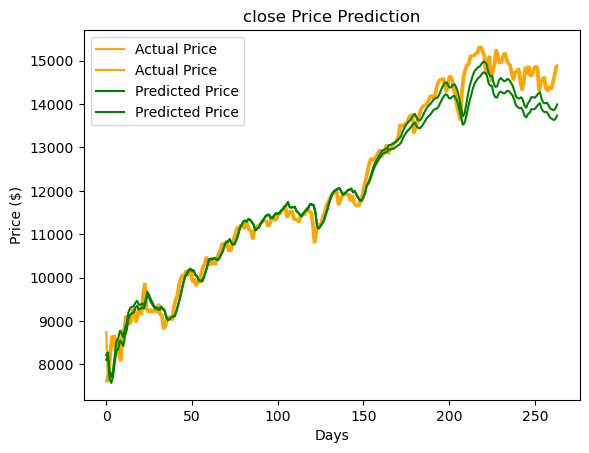

In [73]:
## rmse and ploting
y_pred_orig = DataScaler.inverse_transform(regressor.predict(X_test))
y_test_orig = DataScaler.inverse_transform(y_test)
# invert the scaler to get the absolute price data
#y_test_orig = scaler.inverse_transform(y_test)
#y_pred_orig = scaler.inverse_transform(y_pred)

# rmse calculation
rmse = np.sqrt(np.mean((y_test_orig - y_pred_orig) ** 2))
print('RMSE:', rmse)

# plots of prediction against actual data
import matplotlib.pyplot as plt
plt.plot(y_test_orig, label='Actual Price', color='orange')
plt.plot(y_pred_orig, label='Predicted Price', color='green')
 
plt.title('close Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.legend(loc='best')

plt.show();

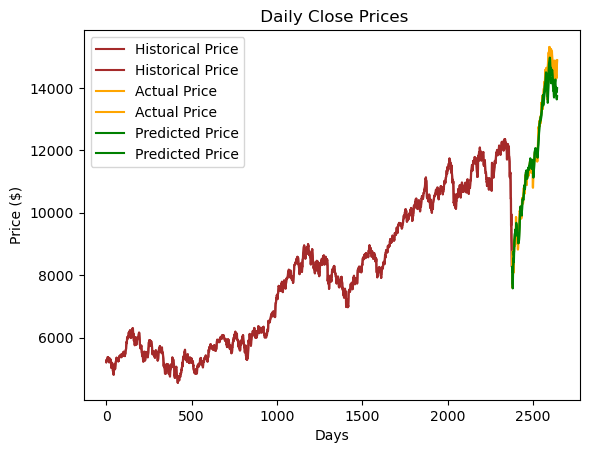

In [74]:
# plot for whole range of data
plt.plot(np.arange(0, len(y_train)), DataScaler.inverse_transform(y_train), color='brown', label='Historical Price')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test_orig)), y_test_orig, color='orange', label='Actual Price')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_pred_orig)), y_pred_orig, color='green', label='Predicted Price')

plt.title(' Daily Close Prices')
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.legend()
plt.show();

In [51]:
# Making predictions on test data
predicted_Price = regressor.predict(X_test)
predicted_Price = DataScaler.inverse_transform(predicted_Price)
print('#### Predicted Prices ####')
print(predicted_Price)

# Getting the original price values for testing data
orig=y_test
orig=DataScaler.inverse_transform(y_test)
print('\n#### Original Prices ####')
print(orig)

9/9 [==============================] - 0s 22ms/step
#### Predicted Prices ####
[[ 7505.1763  7142.8647]
 [ 7396.0586  6969.026 ]
 [ 7136.903   6640.6104]
 [ 6972.733   6434.2812]
 [ 7057.4243  6518.378 ]
 [ 7366.4854  6869.401 ]
 [ 7721.069   7301.238 ]
 [ 8048.4355  7711.289 ]
 [ 8382.762   8125.4175]
 [ 8640.562   8430.188 ]
 [ 8785.954   8611.743 ]
 [ 8984.478   8834.118 ]
 [ 9161.907   9027.746 ]
 [ 9347.674   9226.244 ]
 [ 9495.762   9384.792 ]
 [ 9574.807   9476.109 ]
 [ 9590.328   9507.207 ]
 [ 9625.367   9554.016 ]
 [ 9652.253   9590.254 ]
 [ 9577.151   9530.972 ]
 [ 9497.151   9465.831 ]
 [ 9461.667   9438.018 ]
 [ 9408.256   9390.882 ]
 [ 9444.678   9423.082 ]
 [ 9539.516   9508.148 ]
 [ 9566.005   9532.58  ]
 [ 9517.696   9490.933 ]
 [ 9447.845   9430.331 ]
 [ 9361.713   9353.894 ]
 [ 9293.609   9292.296 ]
 [ 9245.147   9246.561 ]
 [ 9204.018   9206.628 ]
 [ 9221.99    9218.971 ]
 [ 9206.169   9201.575 ]
 [ 9168.6045  9165.689 ]
 [ 9042.105   9051.789 ]
 [ 8903.611   8927.50

In [75]:
data = [6221.450195, 6297.950195, 6526.649902, 6537.25, 6511.899902, 6516.899902, 6493.100098,
        6504.200195, 6516.649902, 6524.049805, 6483.100098, 6493.200195, 6538.3501, 6583.5, 6589.75,
        6601.399902, 6641.75, 6695.899902, 6704.200195, 6721.049805, 6752.549805, 6736.100098,
        6694.350098, 6695.049805, 6796.200195, 6796.399902, 6776.299805, 6733.100098, 6675.299805,
        6779.399902, 6817.649902, 6815.350098, 6840.799805, 6810.512, 6782.75, 6761.25, 6715.25,
        6696.399902, 6694.799805, 6699.350098, 6715.299805, 6652.549805, 6659.850098, 6858.799805,
        7014.25, 7108.75, 7108.75, 7123.149902, 7203, 7263.549805]

Last50Days = np.array(data)# Last 10 days prices


# Normalizing the data just like we did for training the model
Last50Days=DataScaler.transform(Last50Days.reshape(-1,1))

# Changing the shape of the data to 3D
# Choosing TimeSteps as 10 because we have used the same for training
NumSamples=1
TimeSteps=50
NumFeatures=1
Last50Days=Last50Days.reshape(NumSamples,TimeSteps,NumFeatures)

#############################

# Making predictions on data
predicted_Price = regressor.predict(Last50Days)
predicted_Price = DataScaler.inverse_transform(predicted_Price)
print(predicted_Price[0][0])
print(predicted_Price[0][1])
print(np.array(predicted_Price[0][0:2]))

1/1 [==============================] - 0s 21ms/step
7247.5215
7228.575
[7247.5215 7228.575 ]


In [77]:
# save the model to disk
import joblib
filename = 'final_model.sav'
joblib.dump(regressor, filename)

['final_model.sav']

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\psand\anaconda3\New folder\anaconda32\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4